In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.client import device_lib
import os
import matplotlib.pyplot as plt
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib
from PIL import Image

import sys
from keras import models, layers
from keras import Input
from keras.models import Model, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers, initializers, regularizers, metrics
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import BatchNormalization, Conv2D, Activation, Dense, GlobalAveragePooling2D, MaxPooling2D, ZeroPadding2D, Add
import math
tf.__version__
sys.version

'3.7.10 (default, Feb 26 2021, 13:06:18) [MSC v.1916 64 bit (AMD64)]'

In [38]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="0"
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 8837266573141461987,
 name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 9340285095569200124
 physical_device_desc: "device: XLA_CPU device",
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 7046801664
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 11245844114295486146
 physical_device_desc: "device: 0, name: GeForce GTX 1070, pci bus id: 0000:1c:00.0, compute capability: 6.1",
 name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 1406618070541921436
 physical_device_desc: "device: XLA_GPU device"]

In [10]:
data_dir = pathlib.Path('C:/Users/jaehee/Desktop/graduation_project/voice_data_files/2021_9/same_amount_voice/orignal_bad_o(test_voice)')
#image1 = Image.open('C:/Users/jaehee/Desktop/voice_data_files/same_amount_voice/_original_good_o(per_495)/_call_sangho/denoisedsangho_good (1).png')
image2 = Image.open('C:/Users/jaehee/Desktop/graduation_project/voice_data_files/2021_9/same_amount_voice/orignal_bad_o(test_voice)/tomorrow/tomorrow_weather_bad.png')
image_size = image2.size
print(image_size)
img_width=image_size[0]
img_height=image_size[1]

(260, 200)


In [11]:
data_dir
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

7


In [15]:
batch_size = 32
split_percent=0.3
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=split_percent,
    subset="training",
    #color_mode="grayscale",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 7 files belonging to 7 classes.
Using 5 files for training.


In [16]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(5, 200, 260, 3)
(5,)


In [43]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=split_percent ,
    subset="validation",
    seed=123,
    #color_mode="grayscale",
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 3465 files belonging to 7 classes.
Using 1039 files for validation.


In [44]:
class_names = train_ds.class_names
print(class_names)
num_classes = len(class_names)
print(num_classes)

['_call_sangho', '_good_morning', '_recommend_music', '_today_weather', '_tomorrow_weather', '_working_path', '_youtube_dongbinna']
7


In [45]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 200, 260, 3)
(32,)


In [46]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    image_size = images.shape
    print(image_size)

(32, 200, 260, 3)


<Figure size 720x720 with 0 Axes>

In [47]:
for image, label in train_ds.take(10):
    print("Image shape: ", image.numpy().shape)
    print("Label: ", label.numpy())

Image shape:  (32, 200, 260, 3)
Label:  [1 2 2 4 0 6 0 4 1 2 6 5 4 5 2 5 1 1 4 2 1 6 6 6 3 4 0 3 4 3 2 0]
Image shape:  (32, 200, 260, 3)
Label:  [3 3 3 6 3 0 4 6 0 3 6 1 4 0 5 1 2 6 2 1 0 4 1 1 2 4 3 3 3 1 4 1]
Image shape:  (32, 200, 260, 3)
Label:  [5 5 3 5 2 2 2 2 6 6 3 3 3 3 1 1 2 4 6 5 1 5 1 6 0 1 1 5 2 1 5 1]
Image shape:  (32, 200, 260, 3)
Label:  [6 4 1 6 4 0 4 5 5 1 1 0 2 3 6 1 6 4 6 5 3 0 6 5 5 0 3 4 6 1 1 2]
Image shape:  (32, 200, 260, 3)
Label:  [5 1 6 3 3 3 1 4 3 3 1 1 1 4 6 2 3 5 1 6 3 4 6 6 5 5 4 1 1 5 4 4]
Image shape:  (32, 200, 260, 3)
Label:  [6 1 1 4 4 0 0 6 5 5 2 4 4 1 4 1 4 6 3 6 0 2 2 5 6 4 6 1 3 4 1 3]
Image shape:  (32, 200, 260, 3)
Label:  [5 2 0 3 3 2 6 1 3 6 1 4 2 0 1 2 1 4 6 2 0 1 5 3 4 5 4 6 4 6 3 2]
Image shape:  (32, 200, 260, 3)
Label:  [3 5 5 2 6 6 1 0 0 5 2 3 1 1 0 6 6 2 3 5 5 0 3 6 6 1 5 2 6 3 6 6]
Image shape:  (32, 200, 260, 3)
Label:  [0 2 3 6 2 3 2 4 1 1 5 4 0 6 3 3 6 2 0 1 5 4 3 4 0 1 2 1 3 6 1 3]
Image shape:  (32, 200, 260, 3)
Label:  [6 2 0

In [48]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
print(train_ds)

<PrefetchDataset shapes: ((None, 200, 260, 3), (None,)), types: (tf.float32, tf.int32)>


In [49]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

In [50]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 0.9960785


In [51]:
#모델 시작
# k는 클래스 수
K = num_classes
input_tensor = Input(shape=(img_height, img_width, 3), dtype='float32', name='input') # shape=(224, 224, 3)
def conv1_layer(x):    
    x = ZeroPadding2D(padding=(3, 3))(x)
    x = Conv2D(64, (7, 7), strides=(2, 2))(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = ZeroPadding2D(padding=(1,1))(x) 
    return x    
def conv2_layer(x):         
    x = MaxPooling2D((3, 3), 2)(x)      
    shortcut = x
    for i in range(3):
        if (i == 0):
            x = Conv2D(64, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
            
            x = Conv2D(64, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
 
            x = Conv2D(256, (1, 1), strides=(1, 1), padding='valid')(x)
            shortcut = Conv2D(256, (1, 1), strides=(1, 1), padding='valid')(shortcut)            
            x = BatchNormalization()(x)
            shortcut = BatchNormalization()(shortcut)
 
            x = Add()([x, shortcut])
            x = Activation('relu')(x)
            
            shortcut = x
 
        else:
            x = Conv2D(64, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
            
            x = Conv2D(64, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
 
            x = Conv2D(256, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)            
 
            x = Add()([x, shortcut])   
            x = Activation('relu')(x)  
            shortcut = x            
    return x
 
def conv3_layer(x):        
    shortcut = x    
    
    for i in range(4):     
        if(i == 0):            
            x = Conv2D(128, (1, 1), strides=(2, 2), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)        
            
            x = Conv2D(128, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)  
 
            x = Conv2D(512, (1, 1), strides=(1, 1), padding='valid')(x)
            shortcut = Conv2D(512, (1, 1), strides=(2, 2), padding='valid')(shortcut)
            x = BatchNormalization()(x)
            shortcut = BatchNormalization()(shortcut)            
 
            x = Add()([x, shortcut])    
            x = Activation('relu')(x)    
 
            shortcut = x              
        
        else:
            x = Conv2D(128, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
            
            x = Conv2D(128, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
 
            x = Conv2D(512, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)            
 
            x = Add()([x, shortcut])     
            x = Activation('relu')(x)
 
            shortcut = x      
            
    return x

def conv4_layer(x):
    shortcut = x        
  
    for i in range(6):     
        if(i == 0):            
            x = Conv2D(256, (1, 1), strides=(2, 2), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)        
            
            x = Conv2D(256, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)  
 
            x = Conv2D(1024, (1, 1), strides=(1, 1), padding='valid')(x)
            shortcut = Conv2D(1024, (1, 1), strides=(2, 2), padding='valid')(shortcut)
            x = BatchNormalization()(x)
            shortcut = BatchNormalization()(shortcut)
 
            x = Add()([x, shortcut]) 
            x = Activation('relu')(x)
 
            shortcut = x               
        
        else:
            x = Conv2D(256, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
            
            x = Conv2D(256, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
 
            x = Conv2D(1024, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)            
 
            x = Add()([x, shortcut])    
            x = Activation('relu')(x)
 
            shortcut = x      
 
    return x

def conv5_layer(x):
    shortcut = x    
  
    for i in range(3):     
        if(i == 0):            
            x = Conv2D(512, (1, 1), strides=(2, 2), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)        
            
            x = Conv2D(512, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)  
 
            x = Conv2D(2048, (1, 1), strides=(1, 1), padding='valid')(x)
            shortcut = Conv2D(2048, (1, 1), strides=(2, 2), padding='valid')(shortcut)
            x = BatchNormalization()(x)
            shortcut = BatchNormalization()(shortcut)            
 
            x = Add()([x, shortcut])  
            x = Activation('relu')(x)      
 
            shortcut = x               
        
        else:
            x = Conv2D(512, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
            
            x = Conv2D(512, (3, 3), strides=(1, 1), padding='same')(x)
            x = BatchNormalization()(x)
            x = Activation('relu')(x)
 
            x = Conv2D(2048, (1, 1), strides=(1, 1), padding='valid')(x)
            x = BatchNormalization()(x)           
            
            x = Add()([x, shortcut]) 
            x = Activation('relu')(x)       
 
            shortcut = x                  
 
    return x

x = conv1_layer(input_tensor)
x = conv2_layer(x)
x = conv3_layer(x)
x = conv4_layer(x)
x = conv5_layer(x)
x = GlobalAveragePooling2D()(x)
output_tensor = Dense(K, activation='softmax')(x)
resnet50 = Model(input_tensor, output_tensor)
resnet50.summary()


Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 200, 260, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_4 (ZeroPadding2D (None, 206, 266, 3)  0           input[0][0]                      
__________________________________________________________________________________________________
conv2d_106 (Conv2D)             (None, 100, 130, 64) 9472        zero_padding2d_4[0][0]           
__________________________________________________________________________________________________
batch_normalization_106 (BatchN (None, 100, 130, 64) 256         conv2d_106[0][0]                 
_______________________________________________________________________________________

In [52]:
resnet50.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [53]:
tf.test.is_gpu_available()

True

In [54]:
#with tf.device('/GPU:0'):
EPOCHS=130
history = resnet50.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    #callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=2)
)

Epoch 1/130
 6/76 [=>............................] - ETA: 5:27 - loss: 1.9721 - accuracy: 0.1667

KeyboardInterrupt: 

In [19]:
from keras.models import load_model
resnet50.save('C:/Users/jaehee/Desktop/jupyter_proj/model/resnet50_model_9_06(denoise(o),batch=32,size=(260x200),origin_spec(0.3)-epoch=130).h5')

In [21]:
from keras.models import load_model
model = load_model('C:/Users/jaehee/Desktop/jupyter_proj/model/resnet50_model_9_06(denoise(o),batch=32,size=(260x200),origin_spec(0.3)-epoch=130).h5')

In [22]:
train_avg = np.mean(history.history['accuracy'])
test_avg = np.mean(history.history['val_accuracy'])
print('train_avg = {0:.4f}'.format(train_avg))
print('test_avg = {0:.4f}'.format(test_avg))

train_avg = 0.1451
test_avg = 0.1376


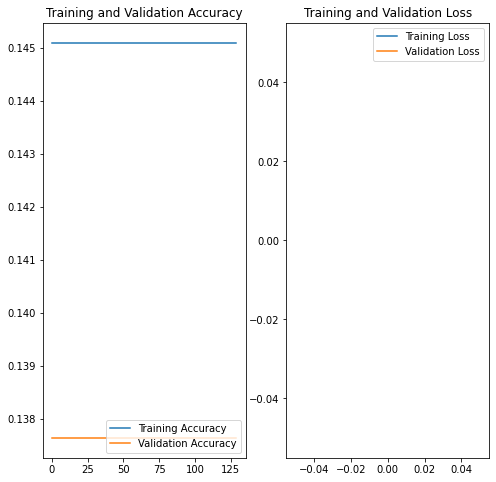

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [61]:
from keras.preprocessing import image
# moring = > C:/Users/jaehee/.keras/datasets/train_data/denoise_origin_size_data/rm_temp_spec/morning/unnoisedg (10).png
# traffic => C:/Users/jaehee/.keras/datasets/train_data/denoise_origin_size_data/rm_temp_spec/traffic/unnoisedc (1).png
# weather => C:/Users/jaehee/.keras/datasets/train_data/denoise_origin_size_data/rm_temp_spec/weather/unnoisedn (1).png

# predict data
# morning => C:/Users/jaehee/.keras/datasets/prediction_data/prediction/ingb_prediction (2)/rm_spec/morning/unnoisedg1.png
# traffic => C:/Users/jaehee/.keras/datasets/prediction_data/prediction/ingb_prediction (2)/rm_spec/traffic/unnoisedc1.png
# weather => C:/Users/jaehee/.keras/datasets/prediction_data/prediction/ingb_prediction (2)/rm_spec/weather/unnoisedn1.png
image_path = 'C:/Users/jaehee/.keras/datasets/prediction_data/prediction/ingb_prediction (2)/rm_spec/weather/unnoisedn3.png'
img = image.load_img(image_path, target_size=(img_height, img_width))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch
#print(img_array)
predictions = resnet50.predict(img_array)
print(predictions)
score = tf.nn.softmax(predictions[0])
print(score)
print("새로운 데이터는 {} 클래스일 확률이 {:.2f}%입니다..".format(class_names[np.argmax(score)], 100 * np.max(score)))

[[4.031670e-14 2.127867e-21 1.000000e+00]]
tf.Tensor([0.21194156 0.21194156 0.57611686], shape=(3,), dtype=float32)
새로운 데이터는 weather 클래스일 확률이 57.61%입니다..


In [71]:
from keras.models import load_model
model = load_model('voice_predict_model.h5')

In [72]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 128, 256, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 256, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 128, 16)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 128, 32)       4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 64, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 32, 64)       